In [1]:
from fastai import *
from fastai.tabular import *

In [2]:
path = Path('data')

In [3]:
df = pd.read_csv(path/'train.csv')

In [4]:
df_test = pd.read_csv(path/'test.csv')

In [23]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
dep_var = 'target'
cat_names = []
cont_names = [f'var_{i}' for i in range(200)]
procs = [FillMissing, Categorify, Normalize]
valid_idx = list(range(150000,199999))

In [7]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names)

In [8]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06


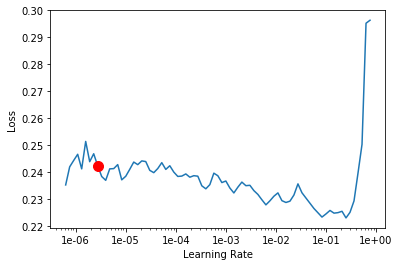

In [12]:
learn.recorder.plot()

In [43]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy
1,0.229782,0.232956,0.913918
2,0.228356,0.233172,0.913618
3,0.221763,0.233293,0.913878


In [44]:
learn.save('2-26 17epochs')

In [10]:
learn.load('2-25 14epochs')

Learner(data=TabularDataBunch;

Train: LabelList (150001 items)
x: TabularList
var_0 -0.5764; var_1 -1.2704; var_2 0.4535; var_3 -0.8326; var_4 0.2341; var_5 -0.5351; var_6 -0.3334; var_7 0.6054; var_8 -1.5612; var_9 -1.4733; var_10 0.4621; var_11 1.0761; var_12 -0.0544; var_13 -1.7138; var_14 0.5619; var_15 -0.0076; var_16 -1.4015; var_17 -0.2276; var_18 -1.3934; var_19 2.2788; var_20 -0.4689; var_21 -0.1280; var_22 -0.6071; var_23 -1.0401; var_24 1.0063; var_25 -0.8244; var_26 -0.1853; var_27 0.4816; var_28 -0.7694; var_29 0.3603; var_30 0.9279; var_31 1.1623; var_32 -1.3005; var_33 0.4893; var_34 -0.4484; var_35 1.3014; var_36 -0.4847; var_37 0.8986; var_38 -1.3957; var_39 0.7888; var_40 0.1814; var_41 -0.3231; var_42 0.5085; var_43 1.5326; var_44 0.4568; var_45 0.2650; var_46 -1.8914; var_47 -0.1649; var_48 0.1171; var_49 -1.4449; var_50 0.2586; var_51 1.9073; var_52 0.3671; var_53 -1.0916; var_54 -0.2239; var_55 0.3675; var_56 -1.5135; var_57 -1.1165; var_58 -0.2675; var_59 1.3885

In [45]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [46]:
preds[1]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [47]:
sub_df = pd.DataFrame({'ID_code': df_test['ID_code'], 'target': preds[1]})

In [48]:
sub_df.to_csv('submission.csv', index=False)